In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck  = 'KH/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_500int/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info['dt*wpe'] * info['fields_interval']

In [3]:
# ps_av  = np.zeros(len(times))
# pid_av = np.zeros(len(times))
# pth_av = np.zeros(len(times))
# for t in np.arange(len(times)):
#   pth, pid = tb.ps_calc(dirs, times[t], sp , norm = False)
#   ps = pth + pid
#   pid_av[t] = np.average(pid)
#   pth_av[t] = np.average(pth)
#   # psi = psi/psi_rms
#   ps_av[t] = pid_av[t] + pth_av[t]

In [4]:
print(twci)

[0.00000000e+00 1.38106800e-01 2.76213600e-01 ... 1.54955830e+02
 1.55093936e+02 1.55232043e+02]


In [5]:
en_out = tb.read_energies(dirs)

In [6]:
def ps_av(dirs, kfilt = True, n = False, save = True):
  times = tb.get_times(dirs)
  pse_av  = np.zeros(len(times))
  pide_av = np.zeros(len(times))
  pthe_av = np.zeros(len(times))
  psi_av  = np.zeros(len(times))
  pidi_av = np.zeros(len(times))
  pthi_av = np.zeros(len(times))
  for t in np.arange(len(times)):
    sp = 'electron'
    pth, pid = tb.ps_calc(dirs, times[t], sp , kfilt = True, norm = False)
    pide_av[t] = np.average(pid)
    pthe_av[t] = np.average(pth)
    pse_av[t] = pide_av[t] + pthe_av[t]
    sp = 'ion'
    pth, pid = tb.ps_calc(dirs, times[t], sp , kfilt = True, norm = False)
    pidi_av[t] = np.average(pid)
    pthi_av[t] = np.average(pth)
    psi_av[t] = pidi_av[t] + pthi_av[t]
  df = pd.DataFrame({'pide': pide_av,'pthe': pthe_av, 'PSe': pse_av, 'pidi': pidi_av, 'pthi': pthi_av, 'PSi': psi_av})
  if save == True:
    df.to_csv(data + 'PS_av.csv')
  return ps_av

In [7]:
ps_av(dirs, kfilt = True)

<function __main__.ps_av(dirs, kfilt=True, n=False, save=True)>

In [8]:
## Calculate ###
sp = 'electron'
# pse_av = ps_av(dirs, sp, kfilt = True)

# en = tb.en_calc(dirs)

In [9]:
sp = 'ion'
# ps_av = ps_av(dirs, sp, kfilt = True)

In [10]:
# ### Read ###
sp = 'electron'
dse = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av = dse[f'PS{sp[0]}']

sp = 'ion'
dsi = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av = dsi[f'PS{sp[0]}']
en = tb.read_calc_energies(dirs)

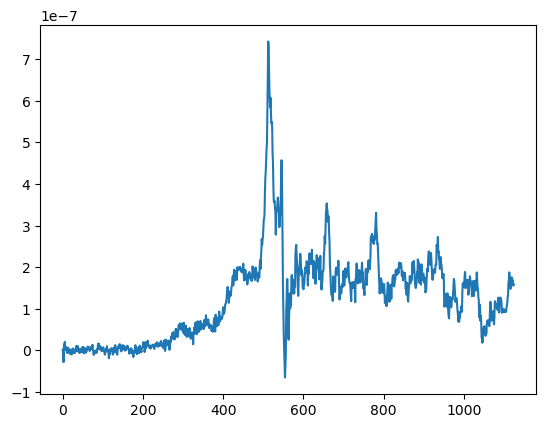

In [11]:
plt.plot(pse_av)

In [12]:
# ps_int = sci.integrate.cumulative_trapezoid(ps_av, initial = 0)



In [13]:
# n = 0
# time_twci = np.round(twci[n],1)
# print(time_twci)
# dpse = pse_int
# dpsi = psi_int
# sp = 'e'
# dEthe = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# # dEthi = en['Ethi'] - en['Ethi'][0]

In [14]:
n = 20
time_twci = np.round(twci[n],1)
print(time_twci)
# pse_int = np.cumsum(pse_av) * dt
# psi_int = np.cumsum(psi_av) * dt
pse_int = sci.integrate.cumulative_trapezoid(pse_av * dt, initial = 0)
psi_int = sci.integrate.cumulative_trapezoid(psi_av * dt, initial = 0)
dpse = pse_int - pse_int[n]
dpsi = psi_int - psi_int[n]
sp = 'e'
dEthe = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
sp = 'i'
dEthi = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# dEthi = en['Ethi'] - en['Ethi'][0]

2.8


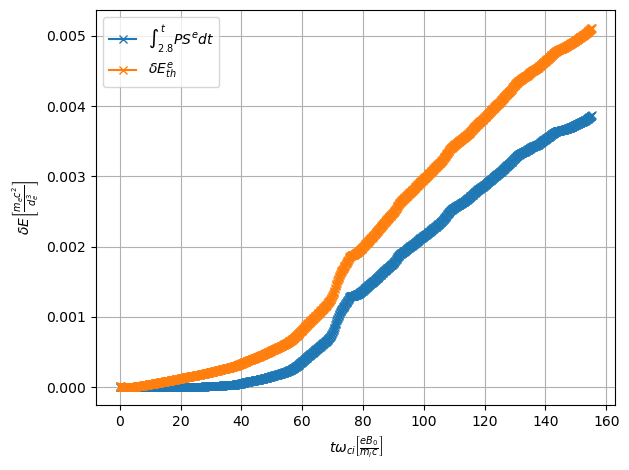

In [15]:
sp = 'e'
plt.plot(twci, dpse ,marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

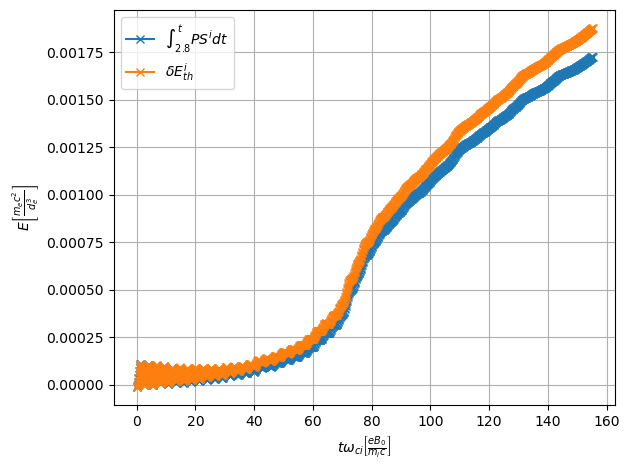

In [16]:
sp = 'i'
plt.plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

In [17]:
ds = pd.read_csv(dirs + 'JE_av.csv')

In [18]:
dEt = (en['Et'] - en['Et'][0])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))

In [19]:
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

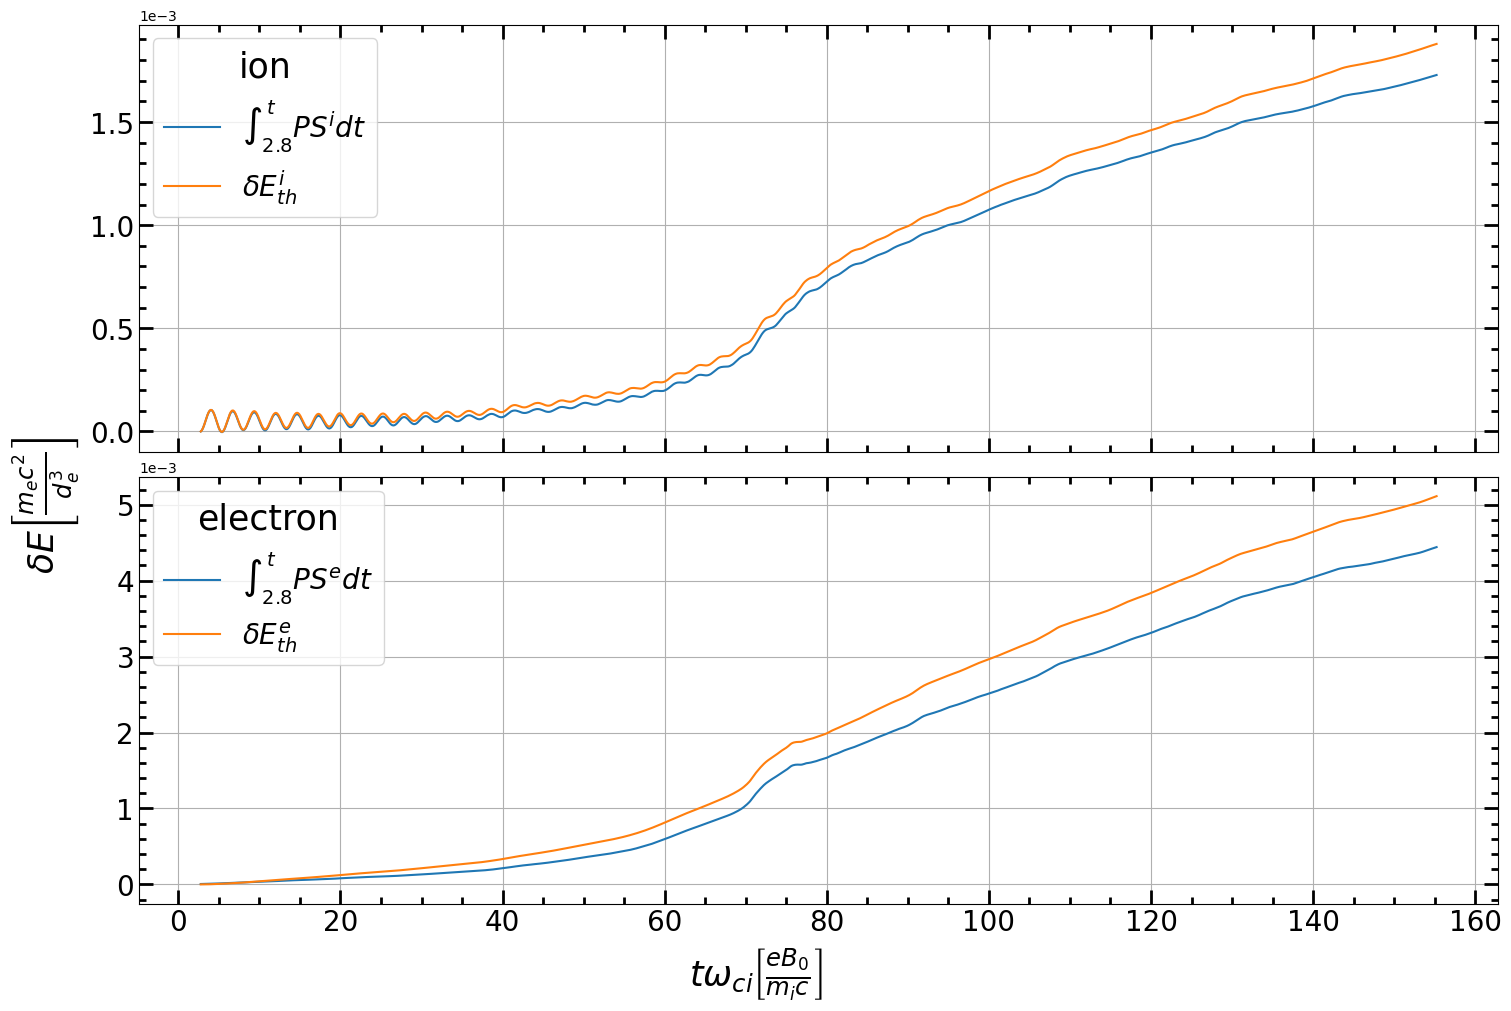

In [20]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
axs[0].plot(twci[n:], dpsi[n:], label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[0].plot(twci[n:], dEthi[n:], label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
axs[1].plot(twci[n:], dpse[n:] + dEt[n:], label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[1].plot(twci[n:], dEthe[n:], label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)

In [21]:
deck = 'KH_400ppc/'
dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info4 = tb.get_vpic_info(dirs)
times4 = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out4 = np.linspace(0, times4[-1] * info['dt*wci'], len(en_out['EM']))
twce4 = np.linspace(0, times4[-1] * info4['dt*wce'], len(times4))
twci4 = np.linspace(0, times4[-1] * info4['dt*wci'], len(times4))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info4['dt*wpe'] * info4['fields_interval']

In [22]:
sp = 'electron'
dse4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av4 = dse4[f'PS{sp[0]}']

sp = 'ion'
dsi4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av4 = dsi4[f'PS{sp[0]}']
en4 = tb.read_calc_energies(dirs)

In [23]:
n = 0
pse_int4 = np.cumsum(pse_av4) * dt
psi_int4 = np.cumsum(psi_av4) * dt
sp = 'electron'
dEthe4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
sp = 'ion'
dEthi4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
dpse4 = pse_int4 - pse_int4[n]
dpsi4 = psi_int4 - psi_int4[n]

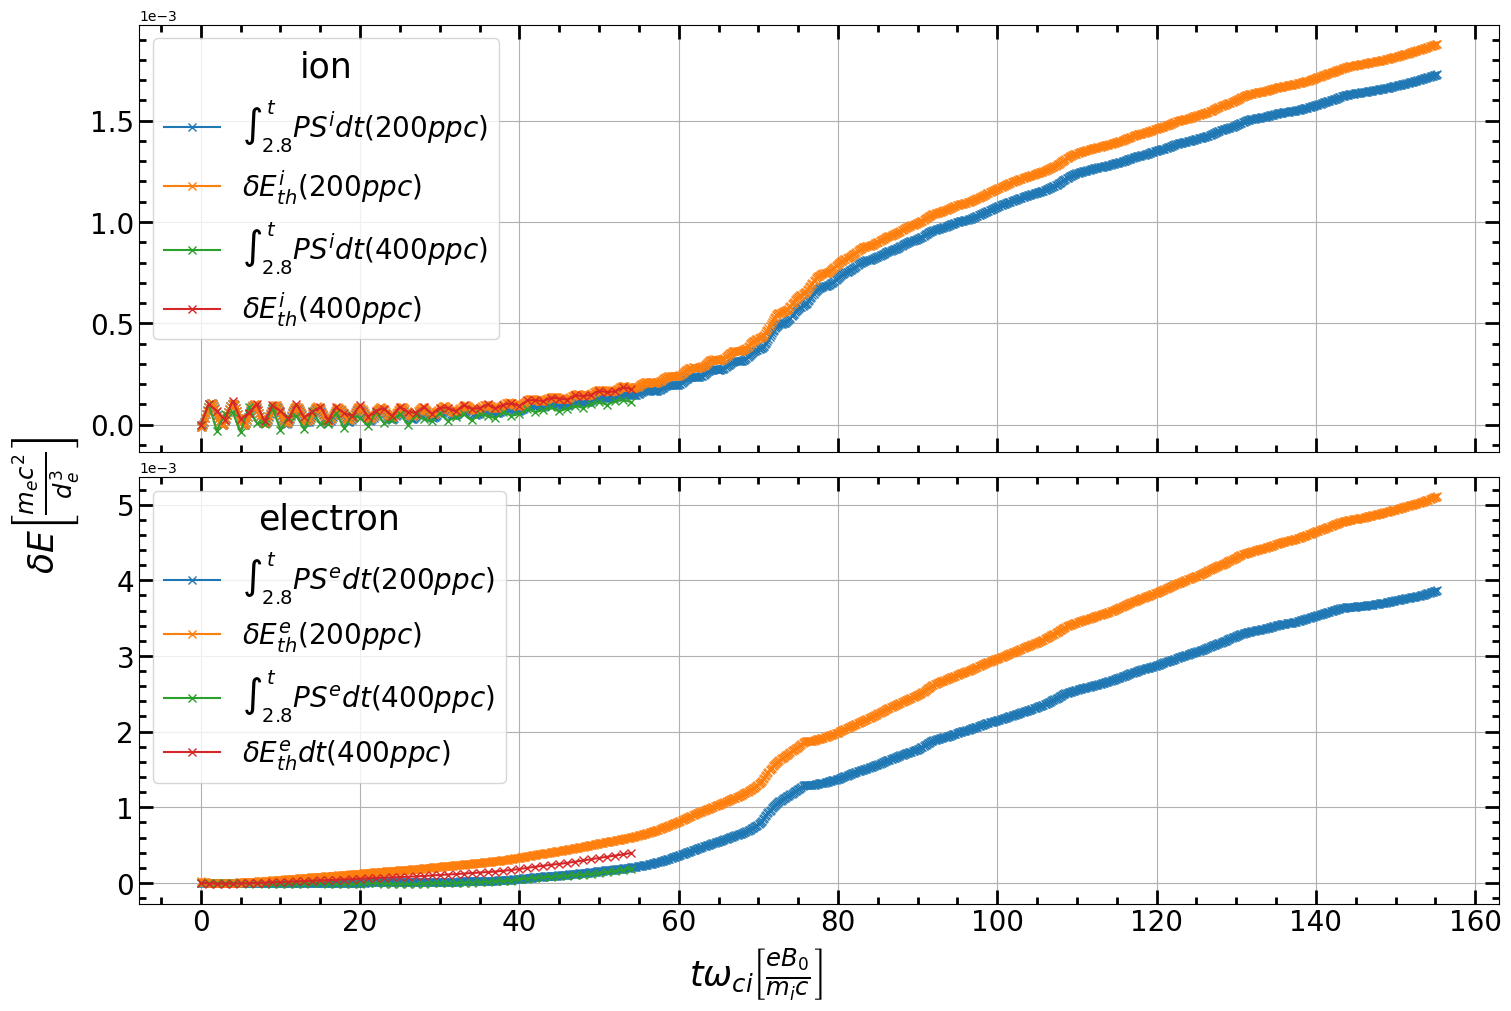

In [24]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
nppc = int(info['nppc'])
axs[0].plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[0].plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[0].plot(twci4, dpsi4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[0].plot(twci4, dEthi4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc4} ppc)$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
nppc = int(info['nppc'])
axs[1].plot(twci, dpse, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[1].plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[1].plot(twci4, dpse4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[1].plot(twci4, dEthe4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'dt({nppc4} ppc)$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)